In [4]:
#Required packages
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
cmd='pip install plot-keras-history==1.1.30'
import os
os.system(cmd)
from plot_keras_history import show_history, plot_history

#fixed seed
np.random.seed(0)

#pre-processing of the data

pulsarfile= open('/content/data.txt','r')
pulsardata = pulsarfile.read()
data=pulsardata.splitlines()
features=data[0].split(',')


for i in range(len(data)):
  
  data[i]=data[i].split(',')

  if i>=1:

    for j in range(len(data[i])):

      data[i][j]=float(data[i][j])

df = pd.DataFrame(data[1:],columns=features).astype(float)
modifiedfeatures=[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve']
inp=df.loc[:,modifiedfeatures]
out=df.loc[:,features[-1]]


[' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']


In [5]:
#splitting of the data set into a test set and a training set
train_size=0.8
test_size=1-train_size
X_train, X_test, Y_train, Y_test = train_test_split(inp, out, train_size=train_size, test_size=test_size)


#handling of unbalanced data 
Y=np.unique(Y_train)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=Y , y=Y_train)
class_weights = dict(enumerate(class_weights)),
print(class_weights)

#OneHot encoded vector
Y_train=to_categorical(Y_train, num_classes=2)
Y_test=to_categorical(Y_test, num_classes=2)

#scaling of the data
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

print(class_weights[0])
print(len(Y_train))

({0: 0.552690496410098, 1: 5.244688644688645},)
{0: 0.552690496410098, 1: 5.244688644688645}
14318


# Nouvelle section

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Dense, Dropout          
from tensorflow.keras import optimizers             
from tensorflow.keras import regularizers           
# creation of the FFNN 
neurons_layer1 = 60
neurons_layer2= 60
#neurons_layer3 = 22
#neurons_layer4 = 2
n_categories = 2
epochs = 30
batch_size = 40 
eta_values = np.logspace(-6,1, 7)
lmbd_values = np.logspace(-6, 1, 7)
def neural_network(neurons_layer1, neurons_layer2 , n_categories, eta, lmbd):
    model = Sequential()
    model.add(Dense(neurons_layer1, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    #trial : model.add(Dropout(0.8))
    model.add(Dense(neurons_layer2, activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd)))
    model.add(Dense(n_categories, activation='sigmoid'))
    sgd = optimizers.Adam(lr=eta)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
   
    return model


In [ ]:
Network_keras=np.zeros((len(eta_values),len(lmbd_values)),dtype=object)
from sklearn.metrics import confusion_matrix
#looking for bets hyperparameters
for i, eta in enumerate(eta_values):
    for j, lmbd in enumerate(lmbd_values):
        Network = neural_network(neurons_layer1, neurons_layer2, n_categories, eta=eta, lmbd=lmbd)
        Network.fit(trainX_scaled, Y_train, epochs=epochs, batch_size=batch_size, verbose=0, class_weight=class_weights[0])
        scores = Network.evaluate(testX_scaled, Y_test)
        
        Network_keras[i][j] = Network
        
        print("Learning rate = ", eta)
        print("lambda = ", lmbd)
        print("Test accuracy: %.3f" % scores[1])
        print("Test loss: %.3f" % scores[0])
        
        predicted= Network.predict(testX_scaled)
        predicted=np.argmax(predicted, axis=1)
        Y_test2=np.argmax(Y_test, axis=1)
        cm = confusion_matrix(Y_test2,predicted)
        print(cm)
        print()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.0765
Learning rate =  1e-06
lambda =  1e-06
Test accuracy: 0.077
Test loss: 0.759
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6378 - accuracy: 0.9235
Learning rate =  1e-06
lambda =  1.4677992676220705e-05
Test accuracy: 0.923
Test loss: 0.638
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.9514
Learning rate =  1e-06
lambda =  0.00021544346900318845
Test accuracy: 0.951
Test loss: 0.673
[[3232   74]
 [ 100  174]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 1.0581 - accuracy: 0.0765
Learning rate =  1e-06
lambda =  0.0031622776601683794
Test accuracy: 0.077
Test loss: 1.058
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 3.5075 - accuracy: 0.9235
Learning rate =  1e-06
lambda =  0.04641588833612782
Test accuracy: 0.923
Test loss: 3.508
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 43.9399 - accuracy: 0.0765
Learning rate =  1e-06
lambda =  0.6812920690579622
Test accuracy: 0.077
Test loss: 43.940
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 617.6113 - accuracy: 0.0765
Learning rate =  1e-06
lambda =  10.0
Test accuracy: 0.077
Test loss: 617.611
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 0.9402
Learning rate =  1.4677992676220705e-05
lambda =  1e-06
Test accuracy: 0.940
Test loss: 0.271
[[3123  183]
 [  31  243]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 0.2683 - accuracy: 0.9369
Learning rate =  1.4677992676220705e-05
lambda =  1.4677992676220705e-05
Test accuracy: 0.937
Test loss: 0.268
[[3111  195]
 [  31  243]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.2986 - accuracy: 0.9422
Learning rate =  1.4677992676220705e-05
lambda =  0.00021544346900318845
Test accuracy: 0.942
Test loss: 0.299
[[3129  177]
 [  30  244]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.4834 - accuracy: 0.9455
Learning rate =  1.4677992676220705e-05
lambda =  0.0031622776601683794
Test accuracy: 0.946
Test loss: 0.483
[[3145  161]
 [  34  240]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.9055 - accuracy: 0.9617
Learning rate =  1.4677992676220705e-05
lambda =  0.04641588833612782
Test accuracy: 0.962
Test loss: 0.906
[[3252   54]
 [  83  191]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 3.6890 - accuracy: 0.9282
Learning rate =  1.4677992676220705e-05
lambda =  0.6812920690579622
Test accuracy: 0.928
Test loss: 3.689
[[3306    0]
 [ 257   17]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 46.2808 - accuracy: 0.9235
Learning rate =  1.4677992676220705e-05
lambda =  10.0
Test accuracy: 0.923
Test loss: 46.281
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.9709
Learning rate =  0.00021544346900318845
lambda =  1e-06
Test accuracy: 0.971
Test loss: 0.134
[[3224   82]
 [  22  252]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9729
Learning rate =  0.00021544346900318845
lambda =  1.4677992676220705e-05
Test accuracy: 0.973
Test loss: 0.131
[[3231   75]
 [  22  252]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9709
Learning rate =  0.00021544346900318845
lambda =  0.00021544346900318845
Test accuracy: 0.971
Test loss: 0.159
[[3224   82]
 [  22  252]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.2341 - accuracy: 0.9668
Learning rate =  0.00021544346900318845
lambda =  0.0031622776601683794
Test accuracy: 0.967
Test loss: 0.234
[[3210   96]
 [  23  251]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.7164 - accuracy: 0.0765
Learning rate =  0.00021544346900318845
lambda =  0.04641588833612782
Test accuracy: 0.077
Test loss: 0.716
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.9235
Learning rate =  0.00021544346900318845
lambda =  0.6812920690579622
Test accuracy: 0.923
Test loss: 0.693
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.0765
Learning rate =  0.00021544346900318845
lambda =  10.0
Test accuracy: 0.077
Test loss: 0.697
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9603
Learning rate =  0.0031622776601683794
lambda =  1e-06
Test accuracy: 0.960
Test loss: 0.152
[[3183  123]
 [  19  255]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9712
Learning rate =  0.0031622776601683794
lambda =  1.4677992676220705e-05
Test accuracy: 0.971
Test loss: 0.127
[[3223   83]
 [  20  254]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1285 - accuracy: 0.9771
Learning rate =  0.0031622776601683794
lambda =  0.00021544346900318845
Test accuracy: 0.977
Test loss: 0.129
[[3248   58]
 [  24  250]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9813
Learning rate =  0.0031622776601683794
lambda =  0.0031622776601683794
Test accuracy: 0.981
Test loss: 0.127
[[3277   29]
 [  38  236]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6366 - accuracy: 0.9235
Learning rate =  0.0031622776601683794
lambda =  0.04641588833612782
Test accuracy: 0.923
Test loss: 0.637
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.7279 - accuracy: 0.0765
Learning rate =  0.0031622776601683794
lambda =  0.6812920690579622
Test accuracy: 0.077
Test loss: 0.728
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.0765
Learning rate =  0.0031622776601683794
lambda =  10.0
Test accuracy: 0.077
Test loss: 0.707
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.9405
Learning rate =  0.04641588833612782
lambda =  1e-06
Test accuracy: 0.941
Test loss: 0.287
[[3111  195]
 [  18  256]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1357 - accuracy: 0.9698
Learning rate =  0.04641588833612782
lambda =  1.4677992676220705e-05
Test accuracy: 0.970
Test loss: 0.136
[[3218   88]
 [  20  254]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1835 - accuracy: 0.9503
Learning rate =  0.04641588833612782
lambda =  0.00021544346900318845
Test accuracy: 0.950
Test loss: 0.183
[[3148  158]
 [  20  254]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.9679
Learning rate =  0.04641588833612782
lambda =  0.0031622776601683794
Test accuracy: 0.968
Test loss: 0.173
[[3213   93]
 [  22  252]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.9235
Learning rate =  0.04641588833612782
lambda =  0.04641588833612782
Test accuracy: 0.923
Test loss: 0.670
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.9235
Learning rate =  0.04641588833612782
lambda =  0.6812920690579622
Test accuracy: 0.923
Test loss: 0.627
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.7300 - accuracy: 0.0765
Learning rate =  0.04641588833612782
lambda =  10.0
Test accuracy: 0.077
Test loss: 0.730
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 1.7964 - accuracy: 0.0765
Learning rate =  0.6812920690579622
lambda =  1e-06
Test accuracy: 0.077
Test loss: 1.796
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.9235
Learning rate =  0.6812920690579622
lambda =  1.4677992676220705e-05
Test accuracy: 0.923
Test loss: 0.325
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.9235
Learning rate =  0.6812920690579622
lambda =  0.00021544346900318845
Test accuracy: 0.923
Test loss: 0.319
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.6609 - accuracy: 0.9235
Learning rate =  0.6812920690579622
lambda =  0.0031622776601683794
Test accuracy: 0.923
Test loss: 0.661
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 1.3201 - accuracy: 0.0765
Learning rate =  0.6812920690579622
lambda =  0.04641588833612782
Test accuracy: 0.077
Test loss: 1.320
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 1.5874 - accuracy: 0.9235
Learning rate =  0.6812920690579622
lambda =  0.6812920690579622
Test accuracy: 0.923
Test loss: 1.587
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 17.6976 - accuracy: 0.0765
Learning rate =  0.6812920690579622
lambda =  10.0
Test accuracy: 0.077
Test loss: 17.698
[[   0 3306]
 [   0  274]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 3.8188 - accuracy: 0.9235
Learning rate =  10.0
lambda =  1e-06
Test accuracy: 0.923
Test loss: 3.819
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 4.2504 - accuracy: 0.9235
Learning rate =  10.0
lambda =  1.4677992676220705e-05
Test accuracy: 0.923
Test loss: 4.250
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 24.5968 - accuracy: 0.0765
Learning rate =  10.0
lambda =  0.00021544346900318845
Test accuracy: 0.077
Test loss: 24.597
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 3.5846 - accuracy: 0.9235
Learning rate =  10.0
lambda =  0.0031622776601683794
Test accuracy: 0.923
Test loss: 3.585
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 11.3105 - accuracy: 0.9235
Learning rate =  10.0
lambda =  0.04641588833612782
Test accuracy: 0.923
Test loss: 11.310
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 2ms/step - loss: 72.7505 - accuracy: 0.9235
Learning rate =  10.0
lambda =  0.6812920690579622
Test accuracy: 0.923
Test loss: 72.751
[[3306    0]
 [ 274    0]]



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 1705.0477 - accuracy: 0.0765
Learning rate =  10.0
lambda =  10.0
Test accuracy: 0.077
Test loss: 1705.048
[[   0 3306]
 [   0  274]]



In [ ]:
Network.summary()

Model: "sequential_87"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_261 (Dense)           (None, 60)                420       
                                                                 
 dense_262 (Dense)           (None, 60)                3660      
                                                                 
 dense_263 (Dense)           (None, 2)                 122       
                                                                 
Total params: 4,202
Trainable params: 4,202
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


112/112 [==============================] - 0s 1ms/step - loss: 0.1897 - accuracy: 0.9668
Learning rate =  10.0
lambda =  10.0
Test accuracy: 0.967
Test loss: 0.190
[[3305    1]
 [ 178   96]]


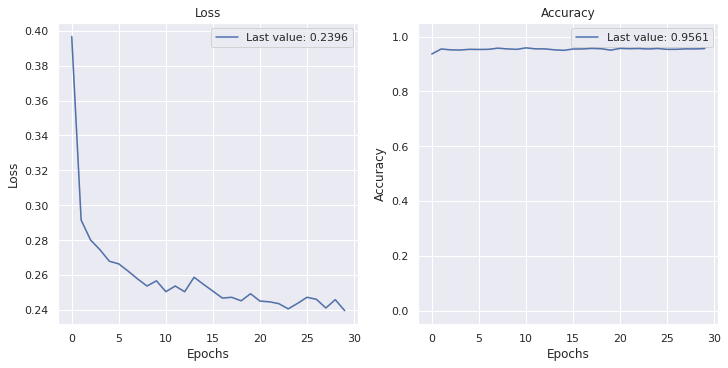

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff858c084d0>,
       dtype=object))

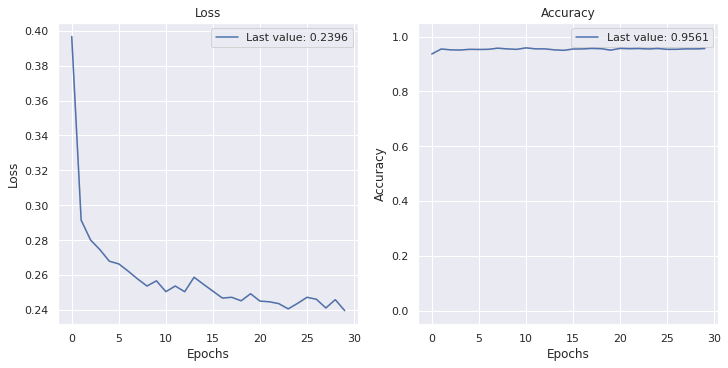

In [ ]:
from sklearn.metrics import confusion_matrix
#checking specific models
Network = neural_network(neurons_layer1, neurons_layer2, n_categories, 
                            eta=0.0031622776601683794, lmbd=0.00316227766016837943)
history =Network.fit(trainX_scaled, Y_train, epochs=epochs, batch_size=batch_size, verbose=0, class_weight=class_weights[0])
scores = Network.evaluate(testX_scaled, Y_test)

        
print("Learning rate = ", eta)
print("lambda = ", lmbd)
print("Test accuracy: %.3f" % scores[1])
print("Test loss: %.3f" % scores[0])
predicted= Network.predict(X_test)
predicted=np.argmax(predicted, axis=1)
Y_test2=np.argmax(Y_test, axis=1)

#confusion matrix
cm = confusion_matrix(Y_test2,predicted)
print(cm)

#history of the training 
show_history(history)
plot_history(history, path="standard.png")


112/112 [==============================] - 0s 1ms/step - loss: 1705.0477 - accuracy: 0.0765


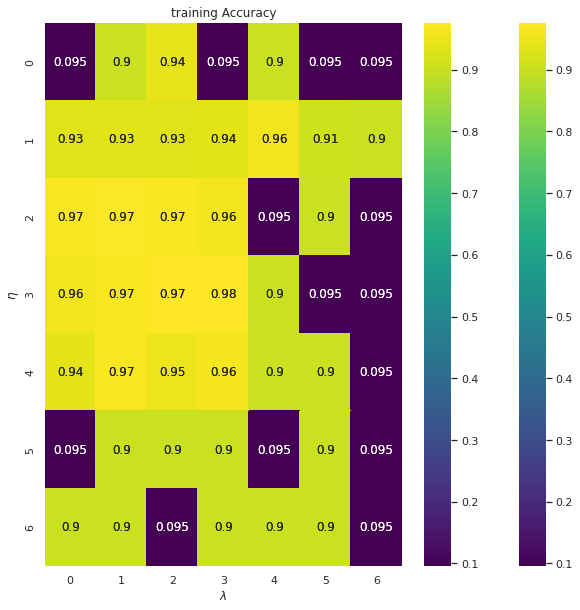

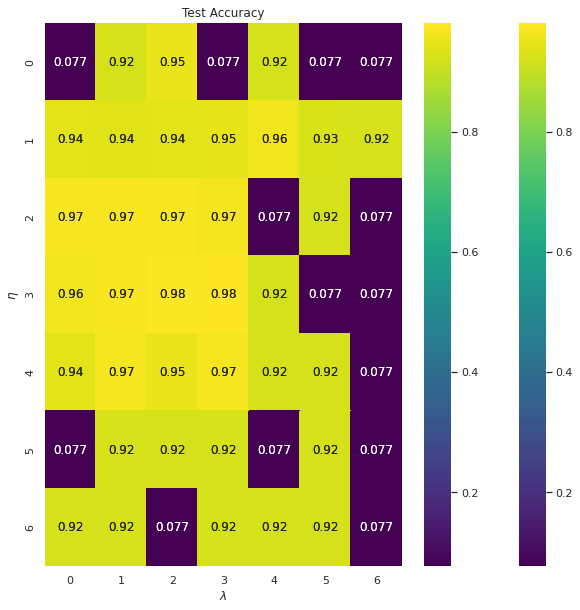

In [ ]:
#Implementing the grid search 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

train_accuracy = np.zeros((len(eta_values), len(lmbd_values)))
test_accuracy = np.zeros((len(eta_values), len(lmbd_values)))

for i in range(len(eta_values)):
    for j in range(len(lmbd_values)):
        Network = Network_keras[i][j]

        train_accuracy[i][j] = Network.evaluate(trainX_scaled, Y_train)[1]
        test_accuracy[i][j] = Network.evaluate(testX_scaled, Y_test)[1]

      
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.plot(heatmap2=sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis"))
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.savefig("/content/training_accuracy3.png")

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.plot(heatmap3=sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis"))
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.savefig("/content/test_accuracy3.png")